In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris_data = iris.data # 이렇게 선언을 해주는 이유를 모르겠네... 그냥 써도 되지 않나?
iris_label = iris.target # 이것도 그렇고
print('붓꽃 target값:', iris_label)
print('붓꽃 target명:', iris.target_names)

붓꽃 target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
붓꽃 target명: ['setosa' 'versicolor' 'virginica']


In [6]:
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['labels'] = iris.target
iris_df.head()

# 독립변수는 꽃받침의 길이와 너비, 꽃잎의 길이와 너비
# 종속변수는 붓꽃의 품종(labels)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
# 대충 학습 8 검증 2 로 나눠서 진행해 보자.
X_train, X_test, y_train, y_test= train_test_split(iris_data,
                                                  iris_label,
                                                  test_size=0.2, # 테스트 20%
                                                  random_state=11) # seed 고정이랑 동일
# 독립변수 학습/검증, 종속변수 학습/검증의 순서로 분리

In [8]:
display(X_train.shape, y_train.shape)
# 독립변수 4개, 종속변수 1개

(120, 4)

(120,)

In [9]:
# DecisionTreeClassifier 객체 생성
dtc = DecisionTreeClassifier(random_state=11)

# 의사결정 나무 학습 가보자고~~~
dtc.fit(X_train, y_train)

# 테스트 해보자고~~~
# 여기선 X_test를 집어넣어 나온 결과가 y_test와 얼마나 일치하는지를 볼 것임
predict = dtc.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score as AS
print('예측 정확도:{0:.4f}'.format(AS(y_test,predict)))

예측 정확도:0.9333


## 교차검증
- K Fold
- Stratified K Fold
- cross_val_score

### K Fold

In [11]:
from sklearn.model_selection import KFold
dtc = DecisionTreeClassifier(random_state=156)
kfold = KFold(n_splits=5) # 5개의 폴드 분리
cross = []
print('붓꽃 데이터 세트 크기:', iris.data.shape[0])

붓꽃 데이터 세트 크기: 150


In [12]:
list(kfold.split(iris.data))[:1]

[(array([ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
          43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
          69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
          82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
          95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
         108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
         121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
         134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
         147, 148, 149]),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]))]

In [13]:
n_iter=0 # 반복횟수 체크 파라미터

# KFold 객체의 split()을 호출하면 폴드 별 학습/검증 데이터의 인덱스를 배열로 반환

for train_index, test_index in kfold.split(iris.data):
    # 인덱스를 이용하여 데이터 추출
    X_train, X_test = iris.data[train_index], iris.data[test_index]
    y_train, y_test = iris.target[train_index], iris.target[test_index]
    # 학습 및 예측
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    # 정확도 출력
    accuracy = AS(y_test, pred).round(4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    # 총정리
    n_iter+=1
    print(f'{n_iter}회차 교차검증 정확도: {accuracy}, 학습 데이터 크기: {train_size}, \
검증 데이터 크기: {test_size}')
    print(f'\n{n_iter}회차 검증 세트 인덱스: {test_index}\n')
    cross.append(accuracy) # 평균 내기 위한 리스트에 각 정확도 삽입
    
print('\n평균 검증 정확도: {0}'.format(np.mean(cross)))


1회차 교차검증 정확도: 1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30

1회차 검증 세트 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

2회차 교차검증 정확도: 0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30

2회차 검증 세트 인덱스: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

3회차 교차검증 정확도: 0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30

3회차 검증 세트 인덱스: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

4회차 교차검증 정확도: 0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30

4회차 검증 세트 인덱스: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

5회차 교차검증 정확도: 0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30

5회차 검증 세트 인덱스: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]


평균 검증 정확도: 0.9


### Stratified K Fold

In [14]:
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['labels'] = iris.target
iris_df.labels.value_counts()

0    50
1    50
2    50
Name: labels, dtype: int64

In [15]:
# 일반적인 K Fold를 사용하면
# 데이터 분리 시 편향이 발생했을 때 해결할 수 없음
# 극단적인 예시로, 3개의 붓꽃 품종에서 2종만 학습 후 나머지 1종을 예측하는 모델을 구상해 보자

kfold = KFold(3)
n_iter=0
for train, test in kfold.split(iris_df):
    n_iter+=1
    label1 = iris_df.labels.iloc[train]
    label2 = iris_df.labels.iloc[test]
    print(f'<{n_iter}회차 교차 검증>')
    print(f'학습 레이블 데이터:\n{label1.value_counts()}')
    print(f'검증 레이블 데이터:\n{label2.value_counts()}\n')
    
# 이렇게 되면 a와 b는 학습하고서 c를 예측해야 하는 상황이 발생함
# 참으로 난리가 나는 것임...

<1회차 교차 검증>
학습 레이블 데이터:
1    50
2    50
Name: labels, dtype: int64
검증 레이블 데이터:
0    50
Name: labels, dtype: int64

<2회차 교차 검증>
학습 레이블 데이터:
0    50
2    50
Name: labels, dtype: int64
검증 레이블 데이터:
1    50
Name: labels, dtype: int64

<3회차 교차 검증>
학습 레이블 데이터:
0    50
1    50
Name: labels, dtype: int64
검증 레이블 데이터:
2    50
Name: labels, dtype: int64



In [16]:
# Stratified K Fold를 쓰면 이러한 편향 문제를 해결해 줄 수 있다!
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(3)
n_iter=0

# 레이블 데이터 세트도 꼭 넣어라!
# 이유인 즉, 레이블 데이터의 분포를 보고서 데이터를 분리하기 때문이다!
for train, test in skf.split(iris_df, iris_df.labels):
    n_iter+=1
    label1 = iris_df.labels.iloc[train]
    label2 = iris_df.labels.iloc[test]
    print(f'<{n_iter}회차 교차 검증>')
    print(f'학습 레이블 데이터:\n{label1.value_counts()}')
    print(f'검증 레이블 데이터:\n{label2.value_counts()}\n')
# 아쥬매니 고르게 분산해서 뽑아놓은 것을 볼 수 있다.
# 코드는 KFold의 경우와 똑같지만 편향 문제를 깰껌히 해결한 것.

<1회차 교차 검증>
학습 레이블 데이터:
2    34
0    33
1    33
Name: labels, dtype: int64
검증 레이블 데이터:
0    17
1    17
2    16
Name: labels, dtype: int64

<2회차 교차 검증>
학습 레이블 데이터:
1    34
0    33
2    33
Name: labels, dtype: int64
검증 레이블 데이터:
0    17
2    17
1    16
Name: labels, dtype: int64

<3회차 교차 검증>
학습 레이블 데이터:
0    34
1    33
2    33
Name: labels, dtype: int64
검증 레이블 데이터:
1    17
2    17
0    16
Name: labels, dtype: int64



### cross_val_score()

In [17]:
# cross_val_score(): 교차검증을 좀 더 편리하게!
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris
IRIS = load_iris()
iris_df = pd.DataFrame(IRIS.data, columns = IRIS.feature_names)
iris_df['labels'] = IRIS.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
dtc = DecisionTreeClassifier()
scores = cross_val_score(dtc, IRIS.data, IRIS.target, scoring='accuracy', cv=3)
# 독립변수 IRIS.data, 종속변수 IRIS.target, 성능지표 정확도, 교차검증 폴드 수 3개
# 학습 알고리즘은 의사결정 나무, 데이터 분류 알고리즘은 Stratified K Fold
# 만약 예측 아니고 회귀분석이었으면 K Fold로 함
print('교차 검증별 정확도:', scores)
print(f'평균 검증 정확도: {scores.mean()}')

교차 검증별 정확도: [0.98 0.92 0.98]
평균 검증 정확도: 0.96


In [19]:
IRIS.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(IRIS.data, IRIS.target,
                                                   test_size=0.2, random_state=121)

dtc = DecisionTreeClassifier()
param = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}
grid_dtc = GridSearchCV(dtc, param_grid = param, cv=3, refit=True)
grid_dtc.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_dtc.cv_results_)
scores_df[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1


In [21]:
# 최적 파라미터 - 여기선 공동 1위
grid_dtc.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [22]:
# 최고 정확도 - 이 역시 여기선 공동 1위
grid_dtc.best_score_

0.975

### 데이터 인코딩(전처리)

In [23]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']
result = LE.fit_transform(items)
result

array([0, 1, 4, 5, 3, 3, 2, 2], dtype=int64)

In [24]:
print('인코딩 클래스:',LE.classes_)
print('디코딩 가 볼까요?',LE.inverse_transform(result))

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
디코딩 가 볼까요? ['TV' '냉장고' '전자레인지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']


In [25]:
# OneHotEncoding
# 숫자 자체의 크기가 중요한 학습의 경우 레이블 인코딩을 해 버리면
# 알고리즘은 이걸 가중치처럼 이해할 우려가 있다.
# 그렇다면 숫자의 크기가 중요한 학습에는 무엇을 써야 하나?
# 바로 원핫 인코딩과 겟 더미스가 있겠다.
# 새로운 요소 출현에 대한 대응이 다르다거나 하는 차이가 있긴 한데
# 일단 우리 수준에선 두 개가 비슷비슷하다 정도로만 알아도 괜찮지 않을까...?
# 여튼 이렇게 하면 회귀분석에도 써먹을 수 있음.
from sklearn.preprocessing import OneHotEncoder

# 레이블 인코딩 먼저 수행
label = LE.fit_transform(items)
# 2차원 데이터로 변환
label = label.reshape(-1,1) # 우리 n행 1열 데이터 필요한데 몇 행 될지 몰라. 그렇담 -1을!
# 원핫 인코딩 돌입!
OH = OneHotEncoder()
result = OH.fit_transform(label)
display(result.toarray(), result.shape)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

(8, 6)

In [26]:
# get_dummies 언급했으면 써야지. 총이 나왔으면 쏴야 하듯이.
dummy = pd.DataFrame(items,columns=['가전'])
pd.get_dummies(dummy)

,가전_TV,가전_냉장고,가전_믹서,가전_선풍기,가전_전자레인지,가전_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [27]:
# 피처 스케일링과 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(iris_df)
sdf = pd.DataFrame(scaled, columns = iris_df.columns)
display(sdf.head())
print(f'평균:\n{sdf.mean()}\n')
print(f'분산:\n{sdf.var()}') # 이건 뭐다? 불편분산

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,-0.900681,1.019004,-1.340227,-1.315444,-1.224745
1,-1.143017,-0.131979,-1.340227,-1.315444,-1.224745
2,-1.385353,0.328414,-1.397064,-1.315444,-1.224745
3,-1.506521,0.098217,-1.283389,-1.315444,-1.224745
4,-1.021849,1.249201,-1.340227,-1.315444,-1.224745


평균:
sepal length (cm)   -2.775558e-16
sepal width (cm)    -9.695948e-16
petal length (cm)   -8.652338e-16
petal width (cm)    -4.662937e-16
labels               1.184238e-17
dtype: float64

분산:
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
labels               1.006711
dtype: float64


In [28]:
# MinMax
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

mscale = mm.fit_transform(iris_df)
mdf = pd.DataFrame(mscale, columns = iris_df.columns)
display(mdf.head(), mdf.apply(['min','max']))
print(f'분산:\n{mdf.var()}') # 이건 뭐다? 불편분산

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
min,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0


분산:
sepal length (cm)    0.052908
sepal width (cm)     0.032983
petal length (cm)    0.089522
petal width (cm)     0.100869
labels               0.167785
dtype: float64


In [29]:
# [과제] Stratified K Fold 케이스에 관한 교차검증을 수행하세요.
# 예제에선 데이터 레이블 분리만 했으니까요.

# 각 회차별 교차검증 정확도 및 검증 세트 인덱스 출력
# 평균 교차검증 정확도 출력

In [30]:
from sklearn.metrics import accuracy_score as AS
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore')

In [31]:
iris = pd.DataFrame(load_iris().data, columns = load_iris().feature_names)
iris['labels'] = load_iris().target
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
# 학습 알고리즘 설정
dtc = DecisionTreeClassifier(random_state=156)
# 분류 알고리즘 설정
skf = StratifiedKFold(n_splits=3)
n = 0 # 반복횟수 카운트
cross = [] # 정확도를 뽑아 모아줄 리스트

for train, test in skf.split(load_iris().data, iris.labels):
    # 학습, 검증용 데이터셋 분리
    X_train, X_test = load_iris().data[train], load_iris().data[test]
    y_train, y_test = iris.labels[train], iris.labels[test]
    # 학습, 예측
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    
    # 정확도 봅시다
    accuracy = AS(y_test, pred)
    cross.append(accuracy)
    n+=1
    print(f'{n}회차 교차검증 정확도: {accuracy}')
    print(f'학습 데이터 크기: {X_train.shape[0]}')
    print(f'검증 데이터 크기: {X_test.shape[0]}')
    print(f'{n}회차 검증 데이터 인덱스: {test}')

print(f'평균 검증 정확도: {np.mean(cross).round(4)}')
# 0~49, 50~99 이런 식으로 천편률적으로 짤라내는 게 아니라
# 원본 데이터 분포를 파악해서 그것을 반영해서 짤라놨음 인덱스 체크해보셈

1회차 교차검증 정확도: 0.98
학습 데이터 크기: 100
검증 데이터 크기: 50
1회차 검증 데이터 인덱스: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]
2회차 교차검증 정확도: 0.94
학습 데이터 크기: 100
검증 데이터 크기: 50
2회차 검증 데이터 인덱스: [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]
3회차 교차검증 정확도: 0.98
학습 데이터 크기: 100
검증 데이터 크기: 50
3회차 검증 데이터 인덱스: [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
평균 검증 정확도: 0.9667


In [33]:
# [과제] train.csv 데이터로 생존자 분석 예측을 위한 분석용 데이터셋을
# 하나의 전처리 사용자 함수를 이용하여 작성한 후
# 모델링 및 성능평가를 수행하세요.
# 전처리는 5개 이상, 정확도는 0.85 이상
# 시각적 탐색 3개 이상

In [34]:
df = pd.read_csv('./dataset/train.csv')
display(df.head(), df.tail(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [35]:
# 전체적인 브리핑 먼저
df.info()
# 패신저 아이디는 그냥 승객 넘버인 듯. 빼도 되겠지?
# survived는 종속변수다. 여기에 유효한 독립변수를 빼내는 것이 핵심.
# 결측치 채워야 하는 거: Age, Cabin, Embarked
# 선착장의 경우 최빈값으로 채우고, Age는 특정 층의 평균을 내고, cabin은 음...
# 여튼 접근법을 궁리는 해보자고
# 없애도 되는 것은 티켓과 페어 정도..?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


S    644
C    168
Q     77
Name: Embarked, dtype: int64
0    S
dtype: object


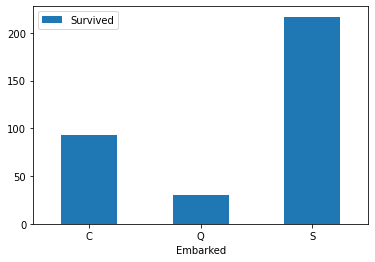

In [36]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
print(df.Embarked.value_counts())
print(df.Embarked.mode())
df[['Survived','Embarked']].groupby('Embarked').sum().plot(kind='bar', rot=0)
plt.show()
# 뭐 걍 최빈값 넣어도 될 듯...

In [37]:
df = pd.read_csv('./dataset/train.csv')
def transfrom_features(df):
    # 컬럼 병합
    df['Family'] = df.SibSp+df.Parch
    # 결측치 보완
    df.Embarked.fillna(df.Embarked.mode(), inplace=True)
    df['Title'] = df.Name.str.split(', ').str[1].str.split('.').str[0]
    tdf = df.groupby('Title')
    a = dict(tdf.Age.agg('mean').round(2))
    for i, j in zip(a.keys(), a.values()):
        df.Age[(df.Age.isnull())&(df.Title==i)] = j
    # 컬럼 삭제
    df.drop(['Name', 'Title','SibSp','Parch','PassengerId','Fare','Ticket','Cabin'], axis=1, inplace=True)
    # 인코딩
    LE = LabelEncoder()
    col = ['Embarked','Sex']
    for i in col:
        df[i] = LE.fit_transform(df[i])
    return df
transfrom_features(df)

def agecat(a):
    cat=''
    if a<14: cat=0
    elif a<20: cat=1
    elif a<30: cat=2
    elif a<40: cat=3
    elif a<50: cat=4
    elif a<60: cat=5
    elif a<70: cat=6
    else: cat = 7
    return cat
df.Age = df.Age.apply(lambda x:agecat(x))
df.head()

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,1,2,2,1
1,1,1,0,3,0,1
2,1,3,0,2,2,0
3,1,1,0,3,2,1
4,0,3,1,3,2,0


In [38]:
# 독립변수, 종속변수

X = df.drop('Survived',axis=1)
Y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=2)


In [39]:
import sklearn
from sklearn.metrics import accuracy_score # 정확도 평가
from sklearn.linear_model import LogisticRegression # 알고리즘 임포트 1
from sklearn.ensemble import RandomForestClassifier # 알고리즘 임포트 2

dtc = sklearn.tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
acc = sklearn.metrics.accuracy_score(y_test, pred)
acc

0.770949720670391

In [40]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train) # 준비~ 학습 시작!
rf_pred = rf_model.predict(X_test) # 학습했으니 평가용 데이터로 예측해 볼까? (predict 함수 사용)

acc_rf = accuracy_score(y_test,rf_pred).round(2)
print(f'rf 정확도: {acc_rf}') # 0.85까지는 해내야 함

# # 모델 학습 및 평가 (2) - 다른 알고리즘으로 해보자

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
acc_lr = accuracy_score(y_test,lr_pred).round(2)

print(f'lr 정확도: {acc_lr}')

rf 정확도: 0.79
lr 정확도: 0.77
